In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed1 = 1982537
seed2 = 1258965
random_numbers = []

In [3]:
for i in range(100):
    ran1=(16807*seed1)%((2**31)-1)
    ran2=(16807*seed2)%((2**31)-1)
    random_numbers.append({'ran1':ran1,'ran2':ran2})
    seed1 = ran1
    seed2 = ran2

In [4]:
df = pd.DataFrame(random_numbers)

In [5]:
df['ran1_norm'] = (df['ran1']-min(df['ran1']))/(max(df['ran1'])-min(df['ran1']))
df['ran2_norm'] = (df['ran2']-min(df['ran2']))/(max(df['ran2'])-min(df['ran2']))

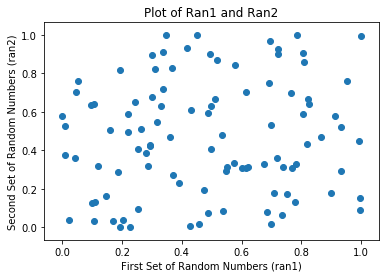

In [6]:
plt.scatter(df['ran1_norm'],df['ran2_norm'])
plt.xlabel('First Set of Random Numbers (ran1)')
plt.ylabel('Second Set of Random Numbers (ran2)')
plt.title('Plot of Ran1 and Ran2')
plt.show()

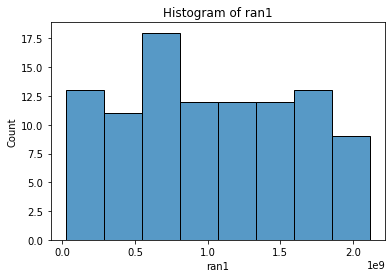

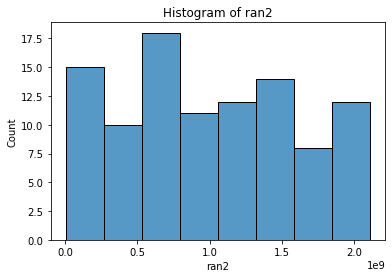

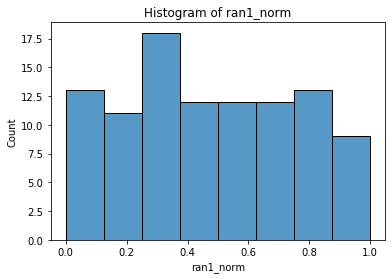

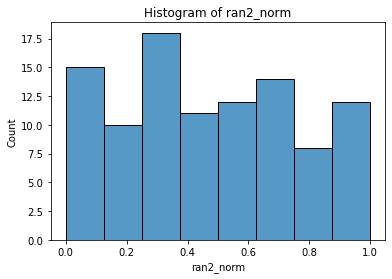

In [12]:
for column in df.columns:
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()

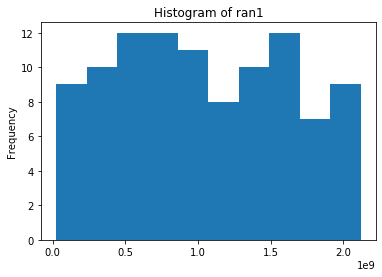

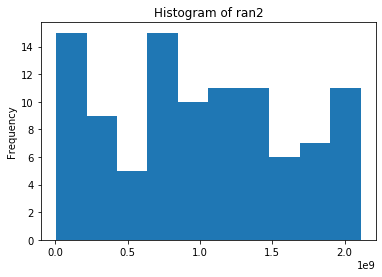

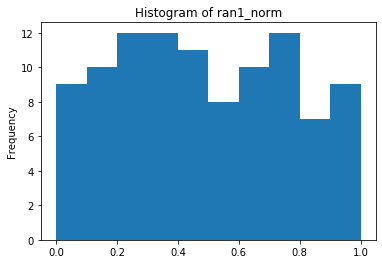

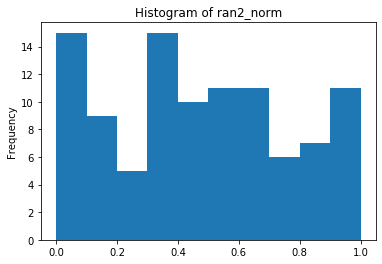

In [13]:
for column in df.columns:
    df[column].plot(kind='hist')
    plt.title(f'Histogram of {column}')
    plt.show()